# Data analysis 101

Based on Part II of [*A Crash Course in Python for Scientists*](http://nbviewer.jupyter.org/gist/rpmuller/5920182#ii.-numpy-and-scipy), version 0.6 by Rick Muller.

This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US).

# Numpy, Scipy and Matplotlib

[Numpy](http://numpy.org) contains core routines for doing fast vector, matrix, and linear algebra-type operations in Python. [Scipy](http://scipy) contains additional routines for optimization, special functions, and so on. Both contain modules written in C and Fortran so that they're as fast as possible. Together, they give Python roughly the same capability that the [Matlab](http://www.mathworks.com/products/matlab/) program offers. (In fact, if you're an experienced Matlab user, there a [guide to Numpy for Matlab users](http://www.scipy.org/NumPy_for_Matlab_Users) just for you.)

To plot the results of our calculations, we will use the [Matplotlib](https://matplotlib.org/) libray. Matplotlib can do a lot; we will see some examples below if you want an idea of the different things you can do, look at the Matplotlib [Gallery](http://matplotlib.org/gallery.html). Rob Johansson's chapter on plotting [Plotting and visualization](http://nbviewer.jupyter.org/github/jrjohansson/numerical-python-book-code/blob/master/ch04-code-listing.ipynb) is also particularly good.

## Standard imports

The following standard incantation will load the librairies and set up the notebook for an interactive session. <br>
(The `%matplotlib inline` line is a special IPython command, that instructs the kernel to draw plots directly in the notebook rather than a separate window.)

In [1]:
import numpy as np
import scipy as sp       # Can omit if your code doesn't use scipy functions
import matplotlib.pyplot as plt
%matplotlib inline

## Making vectors and matrices
Fundamental to both Numpy and Scipy is the ability to work with vectors and matrices. You can create vectors from lists using the **array** command:

There are many more things you can do with Matplotlib. We'll be looking at some of them in the sections to come. In the meantime, 

In [2]:
np.array([1,2,3,4,5,6])

array([1, 2, 3, 4, 5, 6])

You can pass in a second argument to **array** that gives the numeric type. There are a number of types [listed here](http://docs.scipy.org/doc/numpy/user/basics.types.html) that your matrix can be. Thus,

In [3]:
np.array([1,2,3,4,5,6],'float64')

array([ 1.,  2.,  3.,  4.,  5.,  6.])

In [4]:
np.array([1,2,3,4,5,6],'complex64')

array([ 1.+0.j,  2.+0.j,  3.+0.j,  4.+0.j,  5.+0.j,  6.+0.j], dtype=complex64)

In [5]:
np.array([1,2,3,4,5,6],'int')

array([1, 2, 3, 4, 5, 6])

To build matrices, you can either use the array command with lists of lists:

In [6]:
np.array([[0,1],[1,0]])

array([[0, 1],
       [1, 0]])

You can also form empty (zero) matrices of arbitrary shape (including vectors, which Numpy treats as vectors with one row), using the **zeros** command:

In [7]:
np.zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

The first argument is a tuple containing the shape of the matrix, and the second is the data type argument, which follows the same conventions as in the array command. Thus, you can make row vectors:

In [8]:
np.zeros(3,'d')

array([ 0.,  0.,  0.])

In [9]:
np.zeros((1,3),'d')

array([[ 0.,  0.,  0.]])

or column vectors:

In [10]:
np.zeros((3,1),'d')

array([[ 0.],
       [ 0.],
       [ 0.]])

There's also an **identity** command that behaves as you'd expect:

In [11]:
np.identity(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

as well as a **ones** command.

## Linspace, matrix functions, and plotting
The **linspace** command makes a linear array of points from a starting to an ending value.

In [12]:
np.linspace(0,1)

array([ 0.        ,  0.02040816,  0.04081633,  0.06122449,  0.08163265,
        0.10204082,  0.12244898,  0.14285714,  0.16326531,  0.18367347,
        0.20408163,  0.2244898 ,  0.24489796,  0.26530612,  0.28571429,
        0.30612245,  0.32653061,  0.34693878,  0.36734694,  0.3877551 ,
        0.40816327,  0.42857143,  0.44897959,  0.46938776,  0.48979592,
        0.51020408,  0.53061224,  0.55102041,  0.57142857,  0.59183673,
        0.6122449 ,  0.63265306,  0.65306122,  0.67346939,  0.69387755,
        0.71428571,  0.73469388,  0.75510204,  0.7755102 ,  0.79591837,
        0.81632653,  0.83673469,  0.85714286,  0.87755102,  0.89795918,
        0.91836735,  0.93877551,  0.95918367,  0.97959184,  1.        ])

If you provide a third argument, it takes that as the number of points in the space. If you don't provide the argument, it gives a length 50 linear space.

In [13]:
np.linspace(0,1,11)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

**linspace** is an easy way to make coordinates for plotting. Functions in the numpy library (all of which are imported into IPython notebook) can act on an entire vector (or even a matrix) of points at once. Thus,

In [14]:
x = np.linspace(0,2*np.pi)
np.sin(x)

array([  0.00000000e+00,   1.27877162e-01,   2.53654584e-01,
         3.75267005e-01,   4.90717552e-01,   5.98110530e-01,
         6.95682551e-01,   7.81831482e-01,   8.55142763e-01,
         9.14412623e-01,   9.58667853e-01,   9.87181783e-01,
         9.99486216e-01,   9.95379113e-01,   9.74927912e-01,
         9.38468422e-01,   8.86599306e-01,   8.20172255e-01,
         7.40277997e-01,   6.48228395e-01,   5.45534901e-01,
         4.33883739e-01,   3.15108218e-01,   1.91158629e-01,
         6.40702200e-02,  -6.40702200e-02,  -1.91158629e-01,
        -3.15108218e-01,  -4.33883739e-01,  -5.45534901e-01,
        -6.48228395e-01,  -7.40277997e-01,  -8.20172255e-01,
        -8.86599306e-01,  -9.38468422e-01,  -9.74927912e-01,
        -9.95379113e-01,  -9.99486216e-01,  -9.87181783e-01,
        -9.58667853e-01,  -9.14412623e-01,  -8.55142763e-01,
        -7.81831482e-01,  -6.95682551e-01,  -5.98110530e-01,
        -4.90717552e-01,  -3.75267005e-01,  -2.53654584e-01,
        -1.27877162e-01,

In conjunction with **matplotlib**, this is a nice way to plot things:

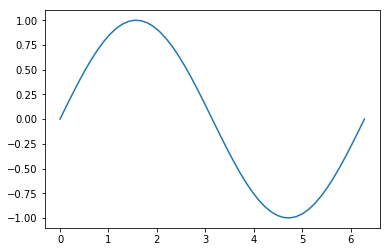

In [15]:
plt.plot(x, np.sin(x))

## Matrix operations
Matrix objects act sensibly when multiplied by scalars:

In [16]:
0.125 * np.identity(3)

array([[ 0.125,  0.   ,  0.   ],
       [ 0.   ,  0.125,  0.   ],
       [ 0.   ,  0.   ,  0.125]])

as well as when you add two matrices together. (However, the matrices have to be the same shape.)

In [17]:
np.identity(2) + np.array([[1,1],[1,2]])

array([[ 2.,  1.],
       [ 1.,  3.]])

Something that confuses Matlab users is that the times (*) operator give element-wise multiplication rather than matrix multiplication:

In [18]:
np.identity(2) * np.ones((2,2))

array([[ 1.,  0.],
       [ 0.,  1.]])

To get matrix multiplication, you need the **dot** command:

In [19]:
np.dot(np.identity(2), np.ones((2,2)))

array([[ 1.,  1.],
       [ 1.,  1.]])

**dot** can also do dot products (duh!):

In [20]:
v = np.array([3,4],'d')
np.sqrt(np.dot(v,v))

5.0

as well as matrix-vector products.

(The matrix multiplication operator **@** was added to Python 3.5. In Numpy, it is equivalent to **dot** for 2D matrices, but as described in the [docs](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html), it will behave differently on arrays with more dimensions.)

In [21]:
np.identity(2) @ np.ones((2,2))

array([[ 1.,  1.],
       [ 1.,  1.]])

In [22]:
np.array([2, 1]) @ np.array([[3],[2]])

array([8])

There are **determinant**, **inverse**, and **transpose** functions that act as you would suppose. Transpose can be abbreviated with ".T" at the end of a matrix object:

In [23]:
m = np.array([[1,2],[3,4]])
m.T

array([[1, 3],
       [2, 4]])

There's also a **diag()** function that takes a list or a vector and puts it along the diagonal of a square matrix. 

In [24]:
np.diag([1,2,3,4,5])

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

We'll find this useful later on.

## Matrix Solvers
You can solve systems of linear equations using the **solve** command:

$$\begin{pmatrix}
1 & 1 & 1 \\
0 & 2 & 5 \\
2 & 5 & -1
\end{pmatrix}
\vec{x} =
\begin{pmatrix}
6 \\ -4 \\ 27
\end{pmatrix}
$$

In [25]:
A = np.array([[1,1,1],[0,2,5],[2,5,-1]])
b = np.array([6,-4,27])
print("x = ", np.linalg.solve(A,b))

x =  [ 5.  3. -2.]


There are a number of routines to compute eigenvalues and eigenvectors

* **eigvals** returns the eigenvalues of a matrix
* **eig** returns the eigenvalues and eigenvectors of a matrix

In [26]:
A = np.array([[13,-4],[-4,7]],'d')
np.linalg.eigvals(A)

array([ 15.,   5.])

In [27]:
np.linalg.eig(A)

(array([ 15.,   5.]), array([[ 0.89442719,  0.4472136 ],
        [-0.4472136 ,  0.89442719]]))

## Least squares fitting

Now that we have these tools in our toolbox, we can start to do some cool stuff with it. We start with a fitting example, where we have some data that we want to fit to some sort of expected behavior. Say we have the following data:

In [28]:
data = np.array(
    [[3.1905781584582433, 0.028208609537968457],
     [4.346895074946466 , 0.007160804747670053],
     [5.374732334047101 , 0.0046962988461934805],
     [8.201284796573875 , 0.0004614473299618756],
     [10.899357601713055, 0.00005038370219939726],
     [16.295503211991434, 4.377451812785309e-7],
     [21.82012847965739 , 3.0799922117601088e-9],
     [32.48394004282656 , 1.524776208284536e-13],
     [43.53319057815846 , 5.5012073588707224e-18]]
    )

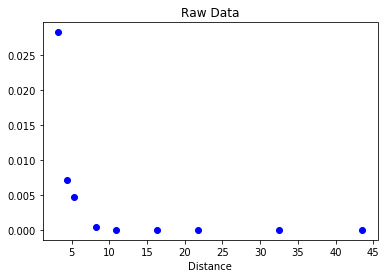

In [29]:
plt.title("Raw Data")
plt.xlabel("Distance")
plt.plot(data[:,0],data[:,1], color='blue', linestyle='', marker='o')

Since we expect the data to have an exponential decay, we can plot it using a semi-log plot.

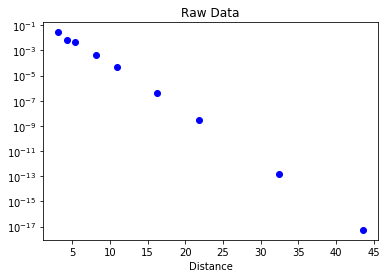

In [30]:
plt.title("Raw Data")
plt.xlabel("Distance")
plt.semilogy(data[:,0],data[:,1],'bo')

(The condensed option `'bo'` stands for `color='blue', linestyle='', marker='o'`. You can read more about the (many!) possible keywords to `plot` in the [docs](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot).)

For a pure exponential decay like this, we can fit the log of the data to a straight line. The above plot suggests this is a good approximation. Given a function
$$ y = Ae^{-ax} $$
$$ \log(y) = \log(A) - ax$$
Thus, if we fit the log of the data versus x, we should get a straight line with slope $a$, and an intercept that gives the constant $A$.

There's a numpy function called **polyfit** that will fit data to a polynomial form. We'll use this to fit to a straight line (a polynomial of order 1)

In [31]:
params = np.polyfit(data[:,0], np.log(data[:,1]),1)
a = params[0]
A = np.exp(params[1])

Let's see whether this curve fits the data.

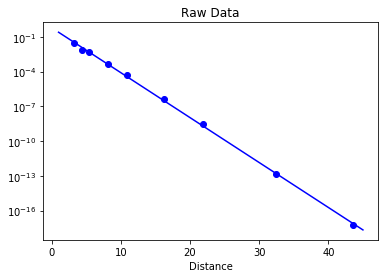

In [32]:
x = np.linspace(1,45)
plt.title("Raw Data")
plt.xlabel("Distance")
plt.semilogy(data[:,0], data[:,1],'bo')
plt.semilogy(x, A*np.exp(a*x), 'b-')

If we have more complicated functions, we may not be able to get away with fitting to a simple polynomial. Consider the following data:

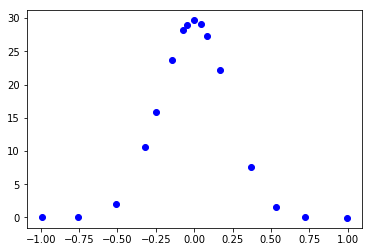

In [33]:
data = np.array(
    [[-0.9902286902286903   , 1.4065274110372852e-19],
     [-0.7566104566104566   , 2.2504438576596563e-18],
     [-0.5117810117810118   , 1.9459459459459454],
     [-0.31887271887271884  , 10.621621621621626],
     [-0.250997150997151    , 15.891891891891893],
     [-0.1463309463309464   , 23.756756756756754],
     [-0.07267267267267263  , 28.135135135135133],
     [-0.04426734426734419  , 29.02702702702703],
     [-0.0015939015939017698, 29.675675675675677],
     [ 0.04689304689304685  , 29.10810810810811],
     [ 0.0840994840994842   , 27.324324324324326],
     [ 0.1700546700546699   , 22.216216216216214],
     [ 0.370878570878571    , 7.540540540540545],
     [ 0.5338338338338338   , 1.621621621621618],
     [ 0.722014322014322    , 0.08108108108108068],
     [ 0.9926849926849926   ,-0.08108108108108646]]
)

plt.plot(data[:,0], data[:,1],'bo')

This data looks more Gaussian than exponential. If we wanted to, we could use **polyfit** for this as well, but let's use the **curve_fit** function from Scipy, which can fit to arbitrary functions. You can learn more using `help(curve_fit)` or `curve_fit?`.

First define a general Gaussian function to fit to.

In [34]:
def gauss(x,A,a): return A*np.exp(a*x**2)

Now fit to it using **curve_fit**:

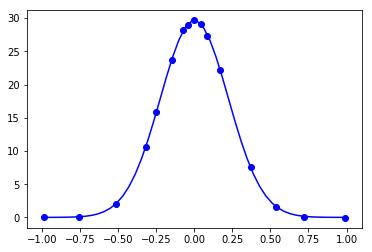

In [35]:
from scipy.optimize import curve_fit

params, conv = curve_fit(gauss,data[:,0], data[:,1])
x = np.linspace(-1,1)
plt.plot(data[:,0],data[:,1], 'bo')
A,a = params
plt.plot(x, gauss(x,A,a), 'b-')

The **curve_fit** routine we just used is built on top of a very good general **minimization** capability in Scipy. You can learn more [at the scipy documentation pages](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

## Monte Carlo, random numbers, and computing $\pi$
Many methods in scientific computing rely on Monte Carlo integration, where a sequence of (pseudo) random numbers are used to approximate the integral of a function. Python has good random number generators in the standard library. The **random()** function gives pseudorandom numbers uniformly distributed between 0 and 1:

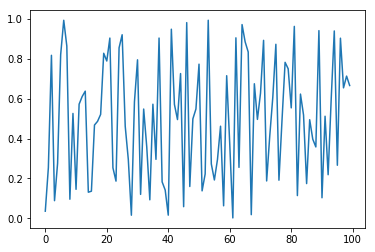

In [36]:
rands = []
for i in range(100):
    rands.append(np.random.rand())
plt.plot(rands)

Numpy's **rand()** function uses the [Mersenne Twister](http://www.math.sci.hiroshima-u.ac.jp/~m-mat/MT/emt.html) algorithm, which is a highly regarded pseudorandom number generator. Numpy provides random samples for a whole slew of [standard distributions](https://docs.scipy.org/doc/numpy/reference/routines.random.html) like the normal distribution:

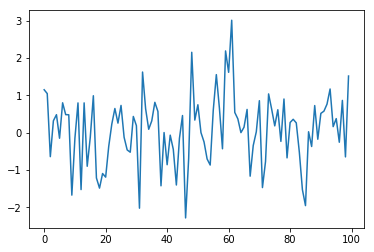

In [37]:
normal_rands = []
for i in range(100):
    normal_rands.append(np.random.normal(0,1))
plt.plot(normal_rands)

It is generally more efficient to generate a list of random numbers all at once, particularly if you're drawing from a non-uniform distribution. Numpy has functions to generate vectors and matrices of particular types of random distributions.

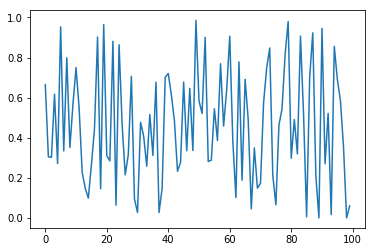

In [38]:
plt.plot(np.random.rand(100))

A very simple way of computing $\pi$ is by taking random numbers as x and y coordinates, and counting how many of them were in the unit circle. For example:

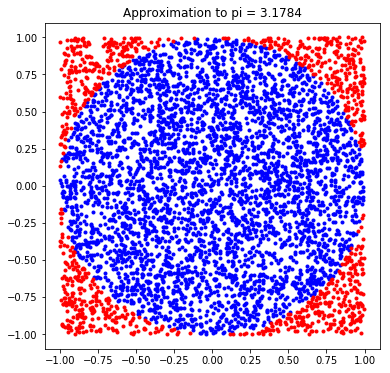

In [39]:
npts = 5000
xs = np.random.uniform(-1, 1, npts)
ys = np.random.uniform(-1, 1, npts)
r = xs**2 + ys**2         # Compute the distance to (0, 0) for each point simultaneously
ninside = np.sum(r < 1)   # Number of points within the unit circle
piapprox = 4*ninside/npts

plt.figure(figsize=(6,6)) # make the figure square
plt.title("Approximation to pi = {}".format(piapprox))
plt.plot(xs[r<1],ys[r<1],'b.')
plt.plot(xs[r>1],ys[r>1],'r.')

The idea behind the program is that the ratio of the area of the unit circle to the square that inscribes it is $\pi/4$, so by counting the fraction of the random points in the square that are inside the circle, we get increasingly good estimates to $\pi$. 

The above code uses some higher level Numpy tricks to compute the radius of each point in a single line, to count how many radii are below one in a single line, and to filter the x,y points based on their radii. Don't worry if you find some of these Numpy tricks a little too cute: the same effects can all be achieved with *list comprehensions* (see the *Python 102* notebook), which are both more general and easier to remember.

As methods of computing $\pi$ go, this is among the worst. A much better method is to use Leibniz's expansion of arctan(1):

$$\frac{\pi}{4} = \sum_k \frac{(-1)^k}{2k+1}$$

In [40]:
n = 100
total = 0
for k in range(n):
    total += pow(-1,k)/(2*k+1.0)
print(4*total)

3.1315929035585537


If you're interested a great method, check out [Ramanujan's method](http://en.wikipedia.org/wiki/Approximations_of_%CF%80). This converges so fast you really need arbitrary precision math to display enough decimal places. You can do this with the Python **decimal** module, if you're interested.